# Testes estatísticos: t, ANOVA e Qui-quadrado

**Objetivo:** Compreender quando e como usar os testes t, ANOVA e Qui-quadrado com exemplos práticos.

---


Eles nos ajudam a responder perguntas como:

* “Essa mudança realmente fez diferença?”
* “Esses dois grupos são iguais ou diferentes?”
* “O que estou vendo é efeito real ou só sorte?”



In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

## 🔍 Se as médias são diferentes, não basta olhar e comparar?

**Não:**

📊 Diferença aparente ≠ diferença significativa

Duas médias podem parecer diferentes em uma tabela, mas essa diferença pode ter acontecido simplesmente por sorte, flutuação natural, ou ruído nos dados.

###*Dois baldes de bolinhas*
Imagine dois baldes com bolinhas numeradas.

```
Você tira 100 bolinhas do balde A e 10 bolinhas do balde B. A média do balde A foi 200, do balde B foi 210.
```


###🟡 Pergunta:

Será que o balde B tem bolinhas com números maiores, ou foi só sorte você tirar bolinhas maiores dessa vez?


> 🔍 O teste t vai te dizer se essa diferença de 10 unidades é significativa o suficiente para concluir que os baldes são mesmo diferentes — e não apenas uma variação aleatória.

O teste t considera 3 coisas:
* A diferença entre as médias:	Quanto maior a diferença, mais provável ser real
* A variabilidade (desvio padrão):	Se os dados são muito espalhados, a diferença pode não ser tão relevante
* O tamanho da amostra:	Com poucos dados, é mais fácil se enganar por acaso

\

| Grupo | Média | Desvio padrão | Tamanho | Visualmente diferente? | Significativo?                                            |
| ----- | ----- | ------------- | ------- | ---------------------- | --------------------------------------------------------- |
| A     | 200   | 20            | 100     | Sim                    | Depende do teste                                          |
| B     | 210   | 40            | 10      | Sim                    | Provavelmente **não** (muito pouco dado e muita variação) |




> O teste t faz a pergunta:
“Essa diferença seria comum de acontecer se os grupos fossem iguais?”


## 🧪 TESTE T – Comparando duas médias
Use quando você quer saber se **duas médias** são estatisticamente diferentes.

**O teste t responde à pergunta:**

“Será que a diferença entre duas médias que eu observei nos dados aconteceu por acaso, ou indica uma diferença real entre os grupos?”

📌 Quando usar?

*   Você tem duas amostras numéricas (ex: ticket médio, salário, tempo, nota)
*   Quer saber se as médias são diferentes
*   Os dados são aproximadamente normais (curva em forma de sino)
*   Os grupos são independentes (ex: clientes de dois planos diferentes)

**Exemplo:** Será que o ticket médio dos clientes do Plano A é diferente do Plano B?

Defina as hipóteses:

*   H₀ (Hipótese Nula): As médias são iguais → ticket_A = ticket_B
*   H₁ (Hipótese Alternativa): As médias são diferentes → ticket_A ≠ ticket_B

In [2]:
# Gerando os dados
np.random.seed(42) #fixa a aleatoriedade do gerador de números.
grupo_a = np.random.normal(200, 20, 10)
grupo_b = np.random.normal(205, 20, 10)


In [3]:
# Rodar teste t de Student: É usado para comparar as médias de dois grupos e verificar se há uma diferença estatisticamente significativa entre eles.
t_stat, p_val_t = stats.ttest_ind(grupo_a, grupo_b) #Função do SciPy

In [4]:
# Interprete o valor-p - Se valor-p < 0,05 → a diferença nas médias não parece ser por acaso

f"Valor-p do Teste t: {p_val_t:.4f}"

'Valor-p do Teste t: 0.0078'

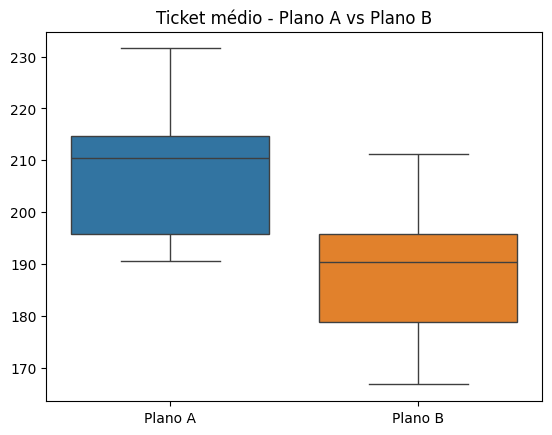

In [6]:
sns.boxplot(data=[grupo_a, grupo_b])
plt.title("Ticket médio - Plano A vs Plano B")
plt.xticks([0, 1], ['Plano A', 'Plano B'])
plt.show()

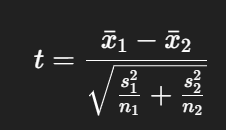

In [6]:
# --- Exemplo 2: Teste T para duas amostras independentes (Ticket Médio) ---

# Shopping
media_shopping = 312
desvio_shopping = 20
n_shopping = 15

# Rua
media_rua = 285
desvio_rua = 25
n_rua = 15

# Erro padrão
se_indep = np.sqrt((desvio_shopping**2 / n_shopping) + (desvio_rua**2 / n_rua))
t_score_indep = (media_shopping - media_rua) / se_indep
df = n_shopping + n_rua - 2
p_value_t_indep = 1 - stats.t.cdf(t_score_indep, df)  # unilateral (shopping > rua)

print("Exemplo 3 – Teste T Independente (Ticket Médio):")
print(f"t = {t_score_indep:.4f}")
print(f"Valor-p (unilateral) = {p_value_t_indep:.4f}")

Exemplo 3 – Teste T Independente (Ticket Médio):
t = 3.2662
Valor-p (unilateral) = 0.0014


## 🧪 TESTE Z – Comparando duas médias maiores
Use quando você quer saber se **duas médias** são estatisticamente diferentes.

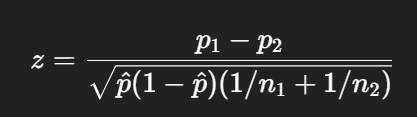

In [8]:
# Campanha A
n1 = 1000
x1 = 40
p1 = x1 / n1

# Campanha B
n2 = 1000
x2 = 60
p2 = x2 / n2

# Proporção combinada
p_hat = (x1 + x2) / (n1 + n2)
#Erro padrao
se = np.sqrt(p_hat * (1 - p_hat) * (1/n1 + 1/n2))
z_score = (p1 - p2) / se
p_value_z = 2 * stats.norm.cdf(z_score)  # Teste bicaudal

print("Exemplo 1 – Teste Z (Campanhas):")
print(f"Z = {z_score:.4f}")
print(f"Valor-p = {p_value_z:.4f}\n")

Exemplo 1 – Teste Z (Campanhas):
Z = -2.0520
Valor-p = 0.0402



| **Critério**                | **Teste Z**                               | **Teste T**                                    |
| --------------------------- | ----------------------------------------- | ---------------------------------------------- |
| 📏 **Uso comum**            | Quando o **tamanho da amostra é grande**  | Quando a **amostra é pequena**                 |
| 🧠 **Desvio padrão (σ)**    | **Conhecido** ou estimado com precisão    | **Desconhecido** (estimado da própria amostra) |
| 📚 **Distribuição usada**   | **Distribuição normal (Z)**               | **Distribuição t de Student**                  |
| 👩‍🔬 **Exemplos práticos** | Teste de proporções; grandes experimentos | Comparar médias de 2 grupos com n < 30         |
| 📈 **Formato da curva**     | Curva normal (simétrica, fina)            | Curva t (mais “gordinha” nas pontas)           |


## 🧪 ANOVA – Comparando três ou mais grupos
Use quando você quer saber se **três ou mais grupos** têm médias diferentes.

**Exemplo:** A média de satisfação é igual entre filiais Norte, Sul e Sudeste?

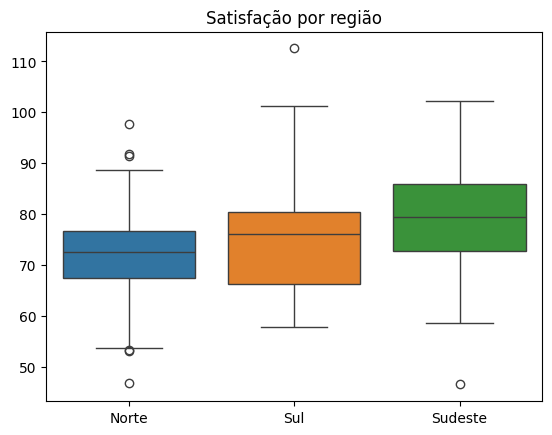

'Valor-p da ANOVA: 0.0000'

In [9]:
# Grupos com diferentes médias
grupo_1 = np.random.normal(73, 10, 100)
grupo_2 = np.random.normal(74, 10, 100)
grupo_3 = np.random.normal(79, 10, 100)

# ANOVA
anova_stat, p_val_anova = stats.f_oneway(grupo_1, grupo_2, grupo_3)

# Visualização
sns.boxplot(data=[grupo_1, grupo_2, grupo_3])
plt.title("Satisfação por região")
plt.xticks([0, 1, 2], ['Norte', 'Sul', 'Sudeste'])
plt.show()

f"Valor-p da ANOVA: {p_val_anova:.4f}"


## 🧪 Teste Qui-quadrado – Associações entre categorias
Use quando você quer saber se há **associação entre variáveis categóricas**.

**Exemplo:** O tipo de plano está relacionado à cidade do cliente?

H₀ (hipótese nula):
❝Não há associação entre o tipo de plano e a cidade do cliente.❞

In [10]:
import pandas as pd
from scipy.stats import chi2_contingency

# Criando a tabela de contingência
tabela = pd.DataFrame({
    'Plano A': [50, 30, 20],
    'Plano B': [30, 45, 25],
    'Plano C': [20, 25, 55]
}, index=['Cidade 1', 'Cidade 2', 'Cidade 3'])

# Teste Qui-quadrado
chi2_stat, p_val_chi, _, _ = chi2_contingency(tabela)

tabela, f"Valor-p do Qui-quadrado: {p_val_chi:.4f}"


(          Plano A  Plano B  Plano C
 Cidade 1       50       30       20
 Cidade 2       30       45       25
 Cidade 3       20       25       55,
 'Valor-p do Qui-quadrado: 0.0000')